# 3W Toolkit

**Version:** 2.0.0  
**Authors:** Bruno Coelho Martins, Carla Pagliari, Eduardo A. B. Silva, Eduardo Henrique, Fernanda Duarte Vilela Reis de Oliveira, Gabriel Henrique Braga Lisboa, Luiza Helena de Andrade Leite, Marcello Campos, Matheus Ferreira Espirito Santo, Matheus Ramos Parracho, Natanael Moura Junior, Pedro Braga Lisboa, Rafael Padilla, Sergio Lima Netto, Thadeu Luiz Barbosa Dias, Umberto Augusto.  
**Description:** Demonstrative notebook with the main functions of *3W Toolkit*.


----

## Table of Contents 📑

1. 🚀 Introduction to 3WToolkit v2.0.0  
   1.1. Installing with `pip install`  
   1.2. Cloning & Installing  
   1.3. Forking & Installing  

2. 📂 Dataset 3W   
   2.1. Downloading the Dataset    
   2.2. Filtering & Exploring the Data   
   2.3 Cleaning the dataset   

3. ⚙️ Preprocessing   
   3.1 Handling missing values (Imputation)  
   3.2 Normalization  
   3.3 Windowing  
   3.4 Renaming columns  

4. 🔎 Feature Extraction  
   4.1 Statistical Feature Extraction  
   4.2 Wavelet Feature Extraction  
   4.3 Exponentially Weighted Statistical Feature Extraction  

5. 📊 Exploratory Analysis  
   5.1. Visualizing Time Series  

6. 🤖 Model Training and Evaluation
7. 🔗 Pipeline Integration


----

## 🚀 1. Introduction to 3WToolkit Version 2.0.0

The **3WToolkit version 2.0.0** is a **modular** and **open-source Artificial Intelligence (AI) toolkit** for **time series processing**, designed for **fault detection and classification** in the operation of **oil wells**.

Based on the experience with the original **3W Toolkit** system and using the [**3W dataset from Petrobras**](https://github.com/petrobras/3W/), the 3W Toolkit version 2.0.0 offers enhanced features such as:

- **Advanced data imputation**
- **Deep feature extraction**
- **Synthetic data augmentation**
- **High-performance computing capabilities** for model training

Please find bellow different ways to install the **3WToolkit** project hosted on GitHub: https://github.com/petrobras/3W.

------

### 1.1 Installation with `pip install`

```bash
pip install git+https://github.com/petrobras/3W.git
```

------

### 1.2. Cloning and installing


```bash
git clone https://github.com/petrobras/3W.git
cd 3W
pip install .
```

For editable/development install (`-e` installs it in editable/development mode, useful for contributing back to the original project via pull requests)

------

### 1.3. Forking and installing 


1. Fork the repository on GitHub https://github.com/petrobras/3W (button **Fork**).

![Forking the repo](../../images/forking_the_repo.jpg)


2. Clone **your forked project**:

After forking, your github account will have a copy of the 3W project.  

Run the commands below, replacing `<YOUR-USERNAME>` with your github username:
```bash
git clone https://github.com/<YOUR-USERNAME>/3W.git
cd 3W
pip install -e .
```


------

### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing ParquetDataset to download and load dataset
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.dataset import ParquetDataset
from ThreeWToolkit.core.enums import EventPrefixEnum

# Apply mean imputation
from ThreeWToolkit.core.base_preprocessing import (
    ImputeMissingConfig,
    NormalizeConfig,
    WindowingConfig,
    RenameColumnsConfig,
)
from ThreeWToolkit.preprocessing import (
    ImputeMissing,
    Normalize,
    Windowing,
    RenameColumns,
)
from ThreeWToolkit.core.base_feature_extractor import (
    StatisticalConfig,
    EWStatisticalConfig,
    WaveletConfig,
)
from ThreeWToolkit.feature_extraction import (
    ExtractStatisticalFeatures,
    ExtractEWStatisticalFeatures,
    ExtractWaveletFeatures,
)
from ThreeWToolkit.data_visualization import DataVisualization


-----

## 📂 2. Dataset 3W

* **Format**: Tabular, split into files in parquet format
* **Hosted** on: 3W Dataset 2.0.0 - Figshare
* **Size**: 1.67 GB
* **Splits**: 10 folders with parquet files, one folder for each event.
* **License** & Usage: Apache 2.0

**Define path**

In [5]:
dataset_path = "../../dataset"

### 2.1 Downloading the Dataset

Let’s download the dataset using the 3W library:

In [6]:
# Create and load
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=False)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


2228

### 2.2 Filtering & Exploring the Data

In [7]:
# Count events
total_events = len(ds)
total_events

2228

Each event is a dict containing: "signal" and "label"

In [8]:
event_id = 0
type(ds[event_id])

dict

In [9]:
ds[event_id].keys()

dict_keys(['signal', 'label', 'file_name'])

Lets check the "signal":

In [10]:
ds[event_id]["signal"]

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-PDG,PT-P,P-TPT,QBS,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT,state
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-04 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.030010,55.14078,NaN,0.0,95.97056,<NA>
2016-07-04 18:00:01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.028295,55.14299,NaN,0.0,95.96629,<NA>
2016-07-04 18:00:02,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.026579,55.14520,NaN,0.0,95.96203,<NA>
2016-07-04 18:00:03,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.024863,55.14741,NaN,0.0,95.95777,<NA>
2016-07-04 18:00:04,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.024550,55.14962,NaN,0.0,95.95351,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-06 12:59:56,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.017727,52.31438,NaN,0.0,96.69060,0
2016-07-06 12:59:57,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.017647,52.31354,NaN,0.0,96.68634,0
2016-07-06 12:59:58,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,0.0,NaN,-17129300.0,NaN,2.017568,52.31269,NaN,0.0,96.68634,0


Let's also check the unique values in "label" 

In [11]:
np.unique(ds[0]["label"])

array([  0., 107.,  nan])

In [12]:
ds[0]["label"]

,class
timestamp,
2016-07-04 18:00:00,<NA>
2016-07-04 18:00:01,<NA>
2016-07-04 18:00:02,<NA>
2016-07-04 18:00:03,<NA>
2016-07-04 18:00:04,<NA>
...,...
2016-07-06 12:59:56,107
2016-07-06 12:59:57,107
2016-07-06 12:59:58,107


Its also possible to filter/split the dataset using different methods:

#### Split by event type:

Lets, as an example select only DRAWN and SIMULATED event types:

In [13]:
event_types = [EventPrefixEnum.DRAWN, EventPrefixEnum.SIMULATED]
ds_config = ParquetDatasetConfig(
    path=dataset_path, event_type=event_types
)  # get drawn and simulated
ds = ParquetDataset(ds_config)
len(ds)  # should be much smaller

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


1109

And of REAL only:

In [14]:
event_types = [EventPrefixEnum.REAL]
ds_config = ParquetDatasetConfig(path=dataset_path, event_type=event_types)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


1119

Any combination of REAL, DRAWN and SIMULATED is also supported.

#### Split by event class

We may also filter by event classes. To select only events from class 0 we would do:

In [15]:
target_class = [0]
ds_config = ParquetDatasetConfig(path=dataset_path, target_class=target_class)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


594

In [16]:
np.unique(ds[event_id]["label"])

array([0])

And only for class 2:

In [17]:
target_class = [2]
ds_config = ParquetDatasetConfig(path=dataset_path, target_class=target_class)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


38

In [18]:
np.unique(ds[event_id]["label"])

array([2])

And we may select multiple classes:

In [19]:
target_class = [0, 2]
ds_config = ParquetDatasetConfig(path=dataset_path, target_class=target_class)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


632

We may combine type and class filters as well. For REAL class 2 events:

In [20]:
event_types = [EventPrefixEnum.REAL]
target_class = [2]
ds_config = ParquetDatasetConfig(path=dataset_path, event_type=event_types, target_class=target_class)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


22

### Split through file list

It is also possible to filter the desired events through a list of event names.

This is particularly useful to define train/test splits as the user may desire.

Given a list of event names (relative to the dataset root):

In [21]:
my_split = [
    "./0/WELL-00008_20170817140222.parquet",
    "./3/SIMULATED_00061.parquet",
    "./4/WELL-00004_20140806090103.parquet",
    "./6/SIMULATED_00117.parquet",
    "./0/WELL-00001_20170201110124.parquet",
    "./5/SIMULATED_00138.parquet",
    "./4/WELL-00005_20170624070158.parquet",
    "./8/SIMULATED_00044.parquet",
    "./5/SIMULATED_00303.parquet",
    "./9/SIMULATED_00028.parquet",
    "./8/SIMULATED_00072.parquet",
    "./7/WELL-00022_20180802233838.parquet",
    "./0/WELL-00003_20170812110000.parquet",
    "./9/SIMULATED_00115.parquet",
    "./1/SIMULATED_00025.parquet",
    "./9/SIMULATED_00065.parquet",
    "./6/SIMULATED_00041.parquet",
    "./5/SIMULATED_00329.parquet",
    "./4/WELL-00004_20141118160016.parquet",
    "./6/SIMULATED_00095.parquet",
]  # can be stored in a my_split.txt file, for instance.

len(my_split)

20

In [22]:
# get only files in split
ds_config = ParquetDatasetConfig(path=dataset_path, split="list", file_list=my_split)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


20

In [23]:
ds[2]["label"]

,class
timestamp,
2014-08-06 09:01:03,4
2014-08-06 09:01:04,4
2014-08-06 09:01:05,4
2014-08-06 09:01:06,4
2014-08-06 09:01:07,4
...,...
2014-08-06 11:59:56,4
2014-08-06 11:59:57,4
2014-08-06 11:59:58,4


### 2.3 Cleaning the dataset

Some dataset tags are mostly absent.

We provide functions for data cleaning and normalization tailored to version 2.0.0.

The parameter `clean_data` performs the following steps:

* Removal of unused tags;
* Identification and removal of invalid sensor readings (outside a predefined range);
* Identification and removal of frozen sensor readings;
* Replacement of faulty sensor readings with `<NA>`;
* Normalization, which recenters and rescales valid data using pre-computed values, ensuring valid statistics can be computed afterward.

In [24]:
ds_config = ParquetDatasetConfig(path=dataset_path)
raw_dataset = ParquetDataset(ds_config)

ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=True)
cleaned_dataset = ParquetDataset(ds_config)

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!
[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


In [25]:
list(raw_dataset[0]["signal"].columns)

['ABER-CKGL',
 'ABER-CKP',
 'ESTADO-DHSV',
 'ESTADO-M1',
 'ESTADO-M2',
 'ESTADO-PXO',
 'ESTADO-SDV-GL',
 'ESTADO-SDV-P',
 'ESTADO-W1',
 'ESTADO-W2',
 'ESTADO-XO',
 'P-ANULAR',
 'P-JUS-CKGL',
 'P-JUS-CKP',
 'P-MON-CKP',
 'P-PDG',
 'P-TPT',
 'QGL',
 'T-JUS-CKP',
 'T-MON-CKP',
 'T-PDG',
 'T-TPT']

In [26]:
list(cleaned_dataset[0]["signal"].columns)

['ABER-CKGL',
 'ABER-CKP',
 'ESTADO-DHSV',
 'ESTADO-M1',
 'ESTADO-M2',
 'ESTADO-PXO',
 'ESTADO-SDV-GL',
 'ESTADO-SDV-P',
 'ESTADO-W1',
 'ESTADO-W2',
 'ESTADO-XO',
 'P-ANULAR',
 'P-JUS-CKGL',
 'P-JUS-CKP',
 'P-MON-CKP',
 'P-PDG',
 'P-TPT',
 'QGL',
 'T-JUS-CKP',
 'T-MON-CKP',
 'T-PDG',
 'T-TPT']

In [27]:
cleaned_dataset[0]["signal"]["P-TPT"]  # normalized values

timestamp
2016-07-04 18:00:00    0.0
2016-07-04 18:00:01    0.0
2016-07-04 18:00:02    0.0
2016-07-04 18:00:03    0.0
2016-07-04 18:00:04    0.0
                      ... 
2016-07-06 12:59:56    0.0
2016-07-06 12:59:57    0.0
2016-07-06 12:59:58    0.0
2016-07-06 12:59:59    0.0
2016-07-06 13:00:00    0.0
Name: P-TPT, Length: 154801, dtype: float64

In [28]:
cleaned_dataset[1000]["signal"]  # Cleaned, normalized and imputed.

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-06 11:10:47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.089532,-0.137420,-0.168300,0.0,0.277090,0.0,0.0,-0.064378
2018-10-06 11:10:48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.089532,-0.137420,-0.168293,0.0,0.277092,0.0,0.0,-0.064377
2018-10-06 11:10:49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.089532,-0.137421,-0.168287,0.0,0.277094,0.0,0.0,-0.064375
2018-10-06 11:10:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.089532,-0.137421,-0.168299,0.0,0.277096,0.0,0.0,-0.064377
2018-10-06 11:10:51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.089532,-0.137423,-0.168308,0.0,0.277098,0.0,0.0,-0.064378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-07 11:50:42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.102207,0.232046,0.104662,0.0,0.364458,0.0,0.0,-0.005665
2018-10-07 11:50:43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.102207,0.232032,0.104637,0.0,0.364457,0.0,0.0,-0.005664
2018-10-07 11:50:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.102208,0.232015,0.104611,0.0,0.364456,0.0,0.0,-0.005663


--------

## 3. ⚙️ Preprocessing

Pre-processing is an essential step to prepare the dataset before training or evaluating models.
The 3W Toolkit provides utility classes to handle missing values, normalize data, segment time series into windows, and rename columns.

In this section, we demonstrate the usage of:

- `ImputeMissing` → Fill missing values with mean, median, or constant.
- `Normalize` → Apply L1, L2, or max normalization.
- `Windowing` → Segment a time series into overlapping windows with a chosen window function.
- `RenameColumns` → Rename DataFrame columns using a mapping dictionary.


First, we select a single event from the dataset and convert its signal to a pandas DataFrame.  
Any columns with `Period` dtype are converted to `datetime` to ensure compatibility with subsequent processing steps.  
Finally, we display the first rows of the signal to inspect the data.



In [29]:
# Select a single event from the dataset
event_id = 0
event = raw_dataset[event_id]

# Convert the 'signal' to a pandas DataFrame
signal = pd.DataFrame(event["signal"])

# Convert Period columns to datetime for compatibility
for col in signal.columns:
    if isinstance(signal[col].dtype, pd.PeriodDtype):
        signal[col] = signal[col].dt.to_timestamp()

# Display the first rows to inspect the signal
signal.head()

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-04 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402240,0.0,-0.579013,0.0,0.0,0.470780,-0.742003,0.0,0.0,-0.030592
2016-07-04 18:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402240,0.0,-0.594322,0.0,0.0,0.469668,-0.741887,0.0,0.0,-0.030732
2016-07-04 18:00:02,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402239,0.0,-0.609631,0.0,0.0,0.468555,-0.741771,0.0,0.0,-0.030871
2016-07-04 18:00:03,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402239,0.0,-0.624940,0.0,0.0,0.467442,-0.741654,0.0,0.0,-0.031011
2016-07-04 18:00:04,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402238,0.0,-0.597055,0.0,0.0,0.467239,-0.741538,0.0,0.0,-0.031150


### 3.1 Handling missing values (Imputation)

The class `ImputeMissing` fills `NaN` values in numeric columns.
It supports three strategies:

- mean → Replace NaN with the column mean.
- median → Replace NaN with the column median.
- constant → Replace NaN with a fixed value (`fill_value`).

The column "T-TPT" will be used to demonstrate this functionality.



First, we'll select 5 index values:


In [30]:
col = "T-TPT"
indices_to_nan = signal.index[:5]
print("Original values at selected indices:")
print(signal.loc[indices_to_nan, col])

Original values at selected indices:
timestamp
2016-07-04 18:00:00   -0.030592
2016-07-04 18:00:01   -0.030732
2016-07-04 18:00:02   -0.030871
2016-07-04 18:00:03   -0.031011
2016-07-04 18:00:04   -0.031150
Name: T-TPT, dtype: float64


Overriding their values with `NaN`:

In [31]:
s = pd.Series([np.nan] * 10)
print("\nValues after introducing NaN:")
print(s)


Values after introducing NaN:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64


Finally, applying mean imputation and verifying the results:


In [32]:
impute_missing = ImputeMissing(ImputeMissingConfig(strategy="constant", fill_value=10))

print("\nValues after mean imputation:")
print(impute_missing(s))


Values after mean imputation:
0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5    10.0
6    10.0
7    10.0
8    10.0
9    10.0
Name: __temp__, dtype: float64


### 3.2 Normalization

The class normalize rescales data using one of the following norms:

- `l1` → Normalize by sum of absolute values.  
- `l2` → Normalize by Euclidean norm.  
- `max` → Normalize by maximum absolute value.  

The column "P-PDG" will be used to demonstrate this functionality.  



Checking column before normalization:

In [33]:
col = "T-TPT"
signal[col].head(10)

timestamp
2016-07-04 18:00:00   -0.030592
2016-07-04 18:00:01   -0.030732
2016-07-04 18:00:02   -0.030871
2016-07-04 18:00:03   -0.031011
2016-07-04 18:00:04   -0.031150
2016-07-04 18:00:05   -0.031290
2016-07-04 18:00:06   -0.031429
2016-07-04 18:00:07   -0.031569
2016-07-04 18:00:08   -0.031708
2016-07-04 18:00:09   -0.031569
Name: T-TPT, dtype: float64

Applying the normalization and checking results:

In [34]:
# Apply L2 normalization row-wise
normalize = Normalize(NormalizeConfig(norm="l2", axis=0))
signal[col] = normalize(signal[col])
signal[col].head(10)

timestamp
2016-07-04 18:00:00   -0.002800
2016-07-04 18:00:01   -0.002813
2016-07-04 18:00:02   -0.002826
2016-07-04 18:00:03   -0.002839
2016-07-04 18:00:04   -0.002851
2016-07-04 18:00:05   -0.002864
2016-07-04 18:00:06   -0.002877
2016-07-04 18:00:07   -0.002890
2016-07-04 18:00:08   -0.002902
2016-07-04 18:00:09   -0.002890
Name: T-TPT, dtype: float64

### 3.3 Windowing

The class `Windowing` divides a 1D time series into overlapping windows.
Each window can be weighted with a function (e.g., Hann, Hamming) and optionally padded.

The column "P-TPT" will be used to demonstrate this functionality.

Checking column before windowing:

In [35]:
col = "P-TPT"
signal[col].head(10)

timestamp
2016-07-04 18:00:00    0.0
2016-07-04 18:00:01    0.0
2016-07-04 18:00:02    0.0
2016-07-04 18:00:03    0.0
2016-07-04 18:00:04    0.0
2016-07-04 18:00:05    0.0
2016-07-04 18:00:06    0.0
2016-07-04 18:00:07    0.0
2016-07-04 18:00:08    0.0
2016-07-04 18:00:09    0.0
Name: P-TPT, dtype: float64

Applying windowing (Hann window, window size 4, 50% overlap, and pad the last window) and checking results:


In [36]:
wind = Windowing(
    WindowingConfig(window="hann", window_size=4, overlap=0.5, pad_last_window=True)
)

print("\nAfter windowing (first 5 windows):")
display(wind(signal[col]).head())


After windowing (first 5 windows):


,var1_t0,var1_t1,var1_t2,var1_t3,win
0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,5


### 3.4 Renaming columns

The class `RenameColumns` allows renaming DataFrame columns using a mapping dictionary.

In this example, we rename the columns "ABER-CKGL" and "ABER-CKP" to "sensor_A" and "sensor_B", respectively.



Checking row names before renaming:

In [37]:
signal.head()

,ABER-CKGL,ABER-CKP,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-04 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402240,0.0,-0.579013,0.0,0.0,0.470780,-0.742003,0.0,0.0,-0.002800
2016-07-04 18:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402240,0.0,-0.594322,0.0,0.0,0.469668,-0.741887,0.0,0.0,-0.002813
2016-07-04 18:00:02,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402239,0.0,-0.609631,0.0,0.0,0.468555,-0.741771,0.0,0.0,-0.002826
2016-07-04 18:00:03,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402239,0.0,-0.624940,0.0,0.0,0.467442,-0.741654,0.0,0.0,-0.002839
2016-07-04 18:00:04,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402238,0.0,-0.597055,0.0,0.0,0.467239,-0.741538,0.0,0.0,-0.002851


Now, renaming and checking the changes:

In [38]:
columns_map = {"ABER-CKGL": "sensor_A", "ABER-CKP": "sensor_B"}
rename = RenameColumns(RenameColumnsConfig(columns_map=columns_map))
signal_renamed = rename(signal)
signal_renamed.head()

,sensor_A,sensor_B,ESTADO-DHSV,ESTADO-M1,ESTADO-M2,ESTADO-PXO,ESTADO-SDV-GL,ESTADO-SDV-P,ESTADO-W1,ESTADO-W2,...,P-JUS-CKGL,P-JUS-CKP,P-MON-CKP,P-PDG,P-TPT,QGL,T-JUS-CKP,T-MON-CKP,T-PDG,T-TPT
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-04 18:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402240,0.0,-0.579013,0.0,0.0,0.470780,-0.742003,0.0,0.0,-0.002800
2016-07-04 18:00:01,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402240,0.0,-0.594322,0.0,0.0,0.469668,-0.741887,0.0,0.0,-0.002813
2016-07-04 18:00:02,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402239,0.0,-0.609631,0.0,0.0,0.468555,-0.741771,0.0,0.0,-0.002826
2016-07-04 18:00:03,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402239,0.0,-0.624940,0.0,0.0,0.467442,-0.741654,0.0,0.0,-0.002839
2016-07-04 18:00:04,0.0,0.0,0.0,0.0,0.0,0.0,0.914069,0.312558,0.0,0.0,...,-0.402238,0.0,-0.597055,0.0,0.0,0.467239,-0.741538,0.0,0.0,-0.002851


------

## 4.  🔎 Feature Extraction


In most time-series machine learning tasks, raw signal data is not used directly to train models. Instead, we use feature extraction to transform segments, or windows, of the time-series into a set of features that better represent the underlying patterns. This process converts a sequence of data points into a single row of features that a model can learn from.

An important part of this process is aligning the extracted features (X) with their corresponding labels (y). Each of our feature extractors is designed to take both X and y as input and return the transformed features and their corectly aligned labels, ready for the modeling stage.

In this section, we will demonstrate the three primary feature extraction methods available in the toolkit:

* `ExtractStatisticalFeatures`: Captures the statistical properties of the data within each window (e.g. mean, std, skewness, kurtosis).
* `ExtractWaveletFeatures`: Decomposes the signal within each window into it's frequency components. It generates approximation (low-frequency representation) and detail coefficients (high-frequency representation).
* `ExtractEWStatisticalFeatures`: Exponentially Weighted statistical features. Similar to the standard statistical features, but give progressively more weight to more recent data points within a window. This is particularly useful when the most recent behavior in a window is more important than older behavior.


First, we select the data for feature extraction using the functionalities presented in section 2

In [39]:
x = raw_dataset[0]["signal"]
y = raw_dataset[0]["label"]

# Filling NaN values with 0 for demonstration purposes
x = x.fillna(0)
y = y.fillna(0)

### 4.1 Statistical Feature Extraction


In class `9`, the following statistical features are extracted:

* `Mean`, `Standard Deviation`: Describe the central tendency and dispersion (volatility) of the signal in the window.
* `Skewness`, `Kurtosis`: Describe the shape of the distribution. Skewness measures its asymmetry, while kurtosis measures how much the data is concentrated on the tail versus the center of the distribution.
* `Minimum`, `1st Quartile`, `Median`, `3rd Quartile`, `Maximum`: Provide a summary of the statistical distribution through quartiles.



In [40]:
# Configure the statistical extractor
config_stats = StatisticalConfig(window_size=20, overlap=0.75)

# Instantiate the extractor
statistical_extractor = ExtractStatisticalFeatures(config_stats)

statistical_extractor.is_windowed = True

# Apply it to the same sample data
df = statistical_extractor(wind(signal[col]))
df

,var1_mean,var1_std,var1_skew,var1_kurt,var1_min,var1_1qrt,var1_med,var1_3qrt,var1_max
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
77396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.2 Wavelet Feature Extraction

The Wavelet Feature Extractor uses the Stationary Wavelet Transform (SWT). This method decomposes the signal within each window into different frequency components, which can often capture patterns that are invisible to standard statistical measures.

For each level of decomposition, two sets of coefficients are generated:

* `Approximation Coefficients (A)`: These capture the low-frequency, underlying trend of the signal. Think of it as a smoothed or downsampled version of the signal within the window.
* `Detail Coefficients (D)`: These capture the high-frequency components, representing noise, spikes, and other abrupt changes.



In [41]:
# Configure the extractor
config_wavelets = WaveletConfig(level=3, overlap=0.875, offset=0)

# Instantiate the extractor
wavelet_extractor = ExtractWaveletFeatures(config_wavelets)

wavelet_extractor.is_windowed = True

# Apply it to our data
df = wavelet_extractor(wind(signal[col]))
df

,var1_A3,var1_D3,var1_A2,var1_D2,var1_A1,var1_D1,var1_A0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
77396,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77397,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77398,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77399,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Configure with an offset
config_wavelets = WaveletConfig(level=3, overlap=0.875, offset=20)

# Instantiate the extractor
wavelet_extractor = ExtractWaveletFeatures(config_wavelets)

wavelet_extractor.is_windowed = True

# Apply it to our data
df_offset = wavelet_extractor(wind(signal[col]))
df_offset

,var1_A3,var1_D3,var1_A2,var1_D2,var1_A1,var1_D1,var1_A0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
77376,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77377,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77378,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77379,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
print("--- No offset ---")
print("Start index:", df.index[0])

print("\n--- Using offset=20 ---")
print("Start index with offset:", df_offset.index[0])
print("Extraction began 20 points later, so the first timestamp is delayed.")

--- No offset ---
Start index: 0

--- Using offset=20 ---
Start index with offset: 0
Extraction began 20 points later, so the first timestamp is delayed.


### 4.3 Exponentially Weighted Statistical Feature Extraction

Provides a specialized version of the standard statistical features. The "EW" stands for **Exponentially Weighted**.

In this method, not all data points in a window are treated equally. Instead, more recent data points are given progressively higher weight than older points. The rate at which the importance of older data decays is controlled by the decay parameter.

This is particularly useful in scenarios where the most recent behavior within a window is more predictive of the outcome than the behavior at the beginning of the window. It creates features that are more sensitive to the latest changes in the signal.



In [44]:
# Configuring the EW statistical extractor
# decay: A value between 0 and 1. A higher value gives more weight to more recent points.
# A decay of 0.9 means each data point has 90% of the weight of the next point in the window.
config_ew = EWStatisticalConfig(window_size=wind.config.window_size, overlap=0.5, decay=0.9)
ew_extractor = ExtractEWStatisticalFeatures(config_ew)
ew_extractor.is_windowed = True

df = ew_extractor(wind(signal[col]))
df

,var1_ew_mean,var1_ew_std,var1_ew_skew,var1_ew_kurt,var1_ew_min,var1_ew_1qrt,var1_ew_med,var1_ew_3qrt,var1_ew_max
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
77396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


----

## 5.  📊 Exploratory Analysis


In this section we will explore and visualize some signals from the dataset.

### 5.1. Visualization Tools Overview

The 3WToolkit provides three ready-to-use visualization functions that make it easy to explore time series data:

- **`DataVisualization.plot_series(...)`**: plots a single time series in a clear and straightforward way.  
- **`DataVisualization.plot_multiple_series(...)`**: allows plotting several series together for comparison.  
- **`DataVisualization.correlation_heatmap(..._)`**: generates a correlation heatmap, helping to identify relationships between multiple features.

In the next sections we will show quick examples of how to use each of these modules.


#### Selecting an event to plot

In [45]:
sig = raw_dataset[123]["signal"].copy()

#### Single Series Example

With `DataVisualization.plot_series` you can quickly visualize one feature over time.  
This is useful to understand the overall trend, variation, and gaps (missing values) in a single signal.


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-tpt.png'


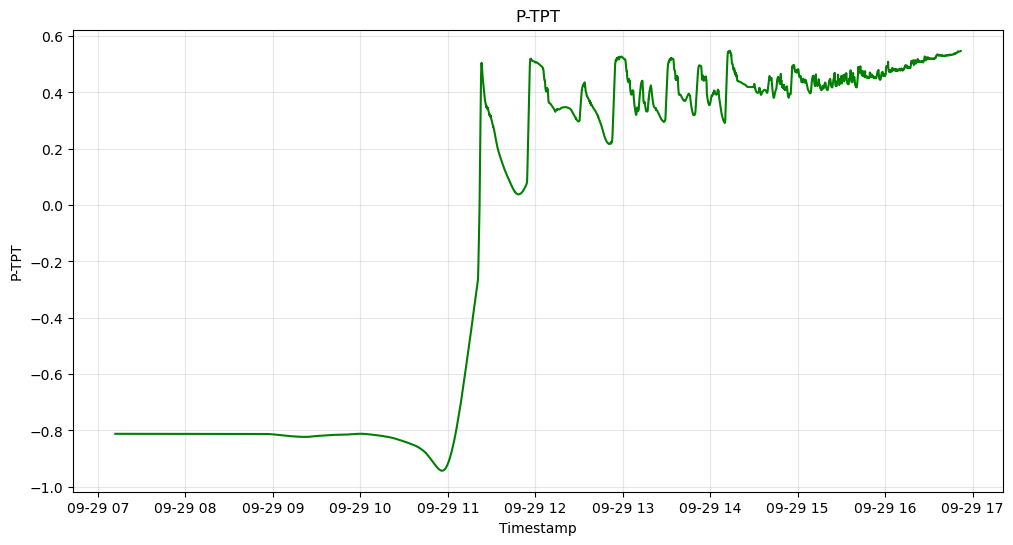

In [46]:
series = sig["P-TPT"]
fig, path = DataVisualization.plot_series(
    series=series,
    title="P-TPT",
    xlabel="Timestamp",
    ylabel="P-TPT",
    overlay_events=False,
    color="green",
)

plt.show()

#### Multiple Series Example

With function `DataVisualization.plot_multiple_series` you can display several features on the same plot.  
This is helpful when you want to compare signals directly and observe how they evolve together.


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-mon-ckp_p-tpt.png'


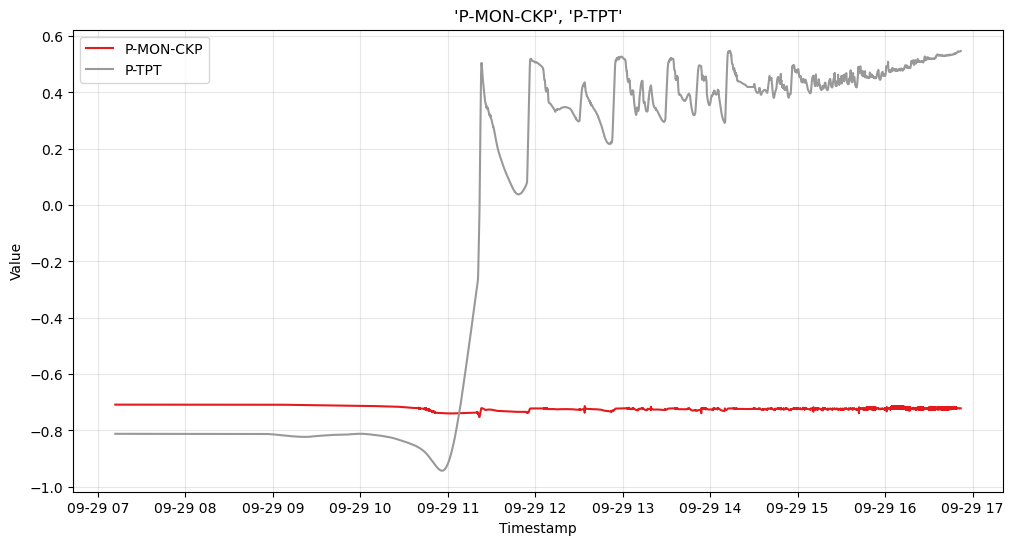

In [47]:
features = ["P-MON-CKP", "P-TPT"]
series_list = [sig[features[0]], sig[features[1]]]

fig = DataVisualization.plot_multiple_series(
    series_list=series_list,
    labels=features,
    title="'P-MON-CKP', 'P-TPT'",
    xlabel="Timestamp",
    ylabel="Value",
)

plt.show()

#### Correlation Heatmap Example

Finally, `PlotCorrelationHeatmap.correlation_heatmap` creates a heatmap of pairwise correlations.  
This is a quick way to check which features are strongly related to each other.


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/correlation_heatmap_of_selected_features.png'


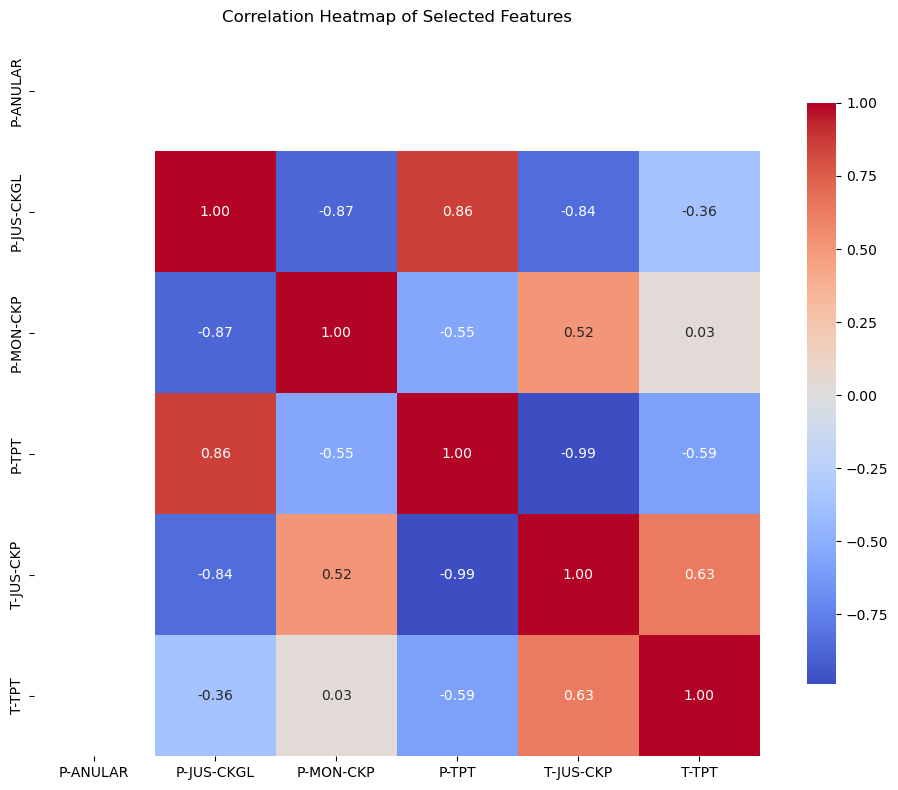

In [48]:
features = ["P-ANULAR", "P-JUS-CKGL", "P-MON-CKP", "P-TPT", "T-JUS-CKP", "T-TPT"]
subset = sig[features]

fig = DataVisualization.correlation_heatmap(
    df_of_series=subset, title="Correlation Heatmap of Selected Features"
)

plt.show()

------

## 6.  🤖 Model Training and Evaluation

## Introduction to Model Training with 3WToolkit

In this section, we introduce the process of training models using 3WToolkit, with the 3W dataset. 

The goal is to demonstrate how to transform raw time series into datasets suitable for supervised trainining, leveraging the toolkit's automation and reproducibility features.

The pipeline includes the following main steps:
- Loading the 3W dataset.
- Segmenting the signals into windows, allowing each window to be treated as an independent sample for the model.
- Training the model, using the windows as inputs and the corresponding labels as target.
- Evaluating the model performance, by computing quantitative metrics (e.g., Accuracy, Recall, F1-score, etc.) and generating visualizations of predictions versus ground truth.

First we import the relevant modules and initialize a ParquetDataset instance, defining the target classes 0, 1 and 2. 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from tqdm import tqdm

from ThreeWToolkit.preprocessing import Windowing
from ThreeWToolkit.trainer.trainer import ModelTrainer, TrainerConfig
from ThreeWToolkit.models.mlp import MLPConfig
from ThreeWToolkit.dataset import ParquetDataset
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.core.base_assessment import ModelAssessmentConfig
from ThreeWToolkit.assessment.model_assess import ModelAssessment
from ThreeWToolkit.core.enums import TaskType

**I. Create a ParquetDataset that loads cleaned data with target classes 0, 1, and 2**

In [50]:
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=True, target_class=[0, 1, 2])
ds = ParquetDataset(ds_config)
ds[19]

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


{'signal':                      ABER-CKGL  ABER-CKP  ESTADO-DHSV  ESTADO-M1  ESTADO-M2  \
 timestamp                                                                     
 2018-05-13 03:56:05        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 03:56:06        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 03:56:07        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 03:56:08        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 03:56:09        0.0       0.0          0.0        0.0        0.0   
 ...                        ...       ...          ...        ...        ...   
 2018-05-13 11:55:59        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 11:56:00        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 11:56:01        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 11:56:02        0.0       0.0          0.0        0.0        0.0   
 2018-05-13 11:56:03        0.

**II. Instantiating configuration classes for the MLP model, Training parameters, and Evaluation parameters.**

With the ParquetDataset instance defined, we can set the parameters for the MLP model using the MLPConfig object. These parameters will be combined with the TrainerConfig and managed through the ModelTrainer, which encapsulates the training workflow.

The defined worflow control most relevant parameters that will be used for training of a model. 

Finally, the ModelTrainer is instantiated with the training configuration, while the ModelAssessment object prepares the evaluation pipeline. The model architecture can be visualized by printing the `trainer.model`.

In [51]:
window_size = 100
mlp_config = MLPConfig(
    input_size=window_size,
    hidden_sizes=(32, 16),
    output_size=3,
    random_seed=11,
    activation_function="relu",
    regularization=None,
)

trainer_config = TrainerConfig(
    optimizer="adam",
    criterion="cross_entropy",
    batch_size=32,
    epochs=20,
    seed=11,
    config_model=mlp_config,
    learning_rate=0.001,
    device="cuda" if torch.cuda.is_available() else "cpu",
    cross_validation=False,
    shuffle_train=True,
)

assessment_config = ModelAssessmentConfig(
    metrics=["balanced_accuracy", "precision", "recall", "f1"],
    task_type=TaskType.CLASSIFICATION,
    class_names=["Class_A", "Class_B", "Class_C"],
    export_results=True,
    generate_report=False,
)

trainer = ModelTrainer(trainer_config)
assessor = ModelAssessment(assessment_config)
print(trainer.model)


MLP(
  (activation_func): ReLU()
  (model): Sequential(
    (0): Linear(in_features=100, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
  )
)


**III. Preprocessing the data**

The next step is to iterate over a dataset of time series events, applying a windowing function to a selected signal column, in this case "T-TPT".

 All windowed segments from all events are then concatenated into a single DataFrame (dfs_final). This prepares the data for supervised training, where each row represents a windowed segment with its corresponding class label.

In [52]:
# Select target columns and prepare training data with windowing
selected_col = "T-TPT"
x_train = []
y_train = []
dfs = []

wind = Windowing(WindowingConfig(window="hann",
        window_size=window_size,
        overlap=0.5,
        pad_last_window=True))

for event in tqdm(ds):
    windowed_signal = wind(
        event["signal"][selected_col]
    )
    windowed_signal.drop(columns=["win"], inplace=True)
    windowed_signal["label"] = np.unique(event["label"]["class"])[0]
    dfs.append(windowed_signal)
dfs_final = pd.concat(dfs, ignore_index=True, axis=0)

100%|██████████| 760/760 [00:24<00:00, 31.53it/s]


**IV. Training**

Finally we can call the train function using the trainer object. 

In [53]:
# Train the MLP model using the ModelTrainer interface
trainer.train(x_train=dfs_final.iloc[:, :-1], y_train=dfs_final["label"].astype(int))

[Pipeline] Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

**V. Assessment**

The trainer class allows direct evaluation of the trained model using the `assess` method, which returns a dictionary containing performance metrics and evaluation parameters.

In [54]:
trainer.assess(
    dfs_final.iloc[:, :-1], dfs_final["label"].astype(int), assessment_config
)

Results exported to /home/rafael/pos-doc/repos/3W/toolkit/output
Model Assessment Summary
Model: MLP
Task Type: TaskType.CLASSIFICATION
Timestamp: 2025-10-15T14:50:44.978103

Metrics:
  balanced_accuracy: 0.9501
  precision: 0.9665
  recall: 0.9651
  f1: 0.9649


{'model_name': 'MLP',
 'task_type': <TaskType.CLASSIFICATION: 'classification'>,
 'predictions': array([2, 2, 2, ..., 0, 0, 0], shape=(440356,)),
 'true_values': array([2, 2, 2, ..., 0, 0, 0], shape=(440356,)),
 'X_test': array([[0.        , 0.00051192, 0.00204574, ..., 0.00459149, 0.00204418,
         0.00051159],
        [0.        , 0.00051175, 0.0020449 , ..., 0.00458746, 0.00204227,
         0.00051108],
        [0.        , 0.00051167, 0.00204482, ..., 0.00459149, 0.00204405,
         0.00051153],
        ...,
        [0.        , 0.000307  , 0.00122664, ..., 0.00274646, 0.00122265,
         0.00030596],
        [0.        , 0.00030587, 0.00122227, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00030595, 0.00122257, ..., 0.        , 0.        ,
         0.        ]], shape=(440356, 100)),
 'metrics': {'balanced_accuracy': 0.9500612456025209,
  'precision': 0.9664839883576251,
  'recall': 0.9651327562245092,
  'f1': 0.9649262819949906},
 'config': {'metr

**Another option, and the most recommended one, is to use the `ModelAssessment` class to perform the evaluation of the results.**

In [55]:
results = assessor.evaluate(trainer.model, dfs_final.iloc[:, :-1], dfs_final["label"].astype(int))
results

Results exported to /home/rafael/pos-doc/repos/3W/toolkit/output
Model Assessment Summary
Model: MLP
Task Type: TaskType.CLASSIFICATION
Timestamp: 2025-10-15T14:50:49.129377

Metrics:
  balanced_accuracy: 0.9501
  precision: 0.9665
  recall: 0.9651
  f1: 0.9649


{'model_name': 'MLP',
 'task_type': <TaskType.CLASSIFICATION: 'classification'>,
 'predictions': array([2, 2, 2, ..., 0, 0, 0], shape=(440356,)),
 'true_values': array([2, 2, 2, ..., 0, 0, 0], shape=(440356,)),
 'X_test': array([[0.        , 0.00051192, 0.00204574, ..., 0.00459149, 0.00204418,
         0.00051159],
        [0.        , 0.00051175, 0.0020449 , ..., 0.00458746, 0.00204227,
         0.00051108],
        [0.        , 0.00051167, 0.00204482, ..., 0.00459149, 0.00204405,
         0.00051153],
        ...,
        [0.        , 0.000307  , 0.00122664, ..., 0.00274646, 0.00122265,
         0.00030596],
        [0.        , 0.00030587, 0.00122227, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00030595, 0.00122257, ..., 0.        , 0.        ,
         0.        ]], shape=(440356, 100)),
 'metrics': {'balanced_accuracy': 0.9500612456025209,
  'precision': 0.9664839883576251,
  'recall': 0.9651327562245092,
  'f1': 0.9649262819949906},
 'config': {'metr

Retrieving aggregated metrics

In [56]:
print(assessor.summary())

Model Assessment Summary
Model: MLP
Task Type: TaskType.CLASSIFICATION
Timestamp: 2025-10-15T14:50:49.129377

Metrics:
  balanced_accuracy: 0.9501
  precision: 0.9665
  recall: 0.9651
  f1: 0.9649


The trainer object also collects a history of validation and training loss that can be visualized after the training is completed. 

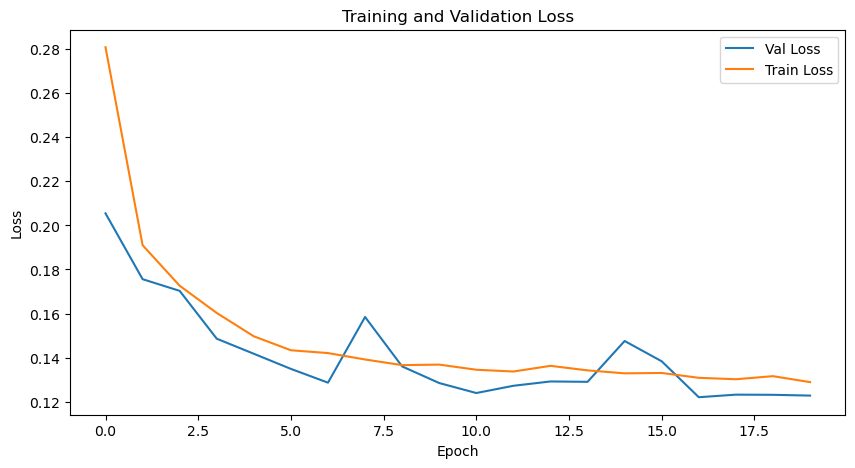

In [57]:
# Visualize training history
plt.figure(figsize=(10, 5))
plt.plot(trainer.history[0]["val_loss"], label="Val Loss")
plt.plot(trainer.history[0]["train_loss"], label="Train Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

## 7. 🔗 Pipeline Integration

The ``Pipeline`` class provides a powerful way to chain together all the steps of your machine learning workflow in a single, cohesive structure. This approach ensures reproducibility, reduces boilerplate code, and makes it easier to experiment with different configurations.

The Pipeline in 3WToolkit v2.0.0 follows a sequential execution model where each step processes the data and passes it to the next stage. The pipeline automatically handles data transformations between steps, ensuring compatibility and proper data flow.

________

**Pipeline Execution Flow:**

```markdown
Dataset Loading → Preprocessing → Feature Extraction → Model Training → Model Assessment
```

Each component in the pipeline is configured using its respective configuration class, which encapsulates all the parameters needed for that specific step.

______

### 7.1. Creating a Basic Pipeline

To create a pipeline, you'll need to import the necessary configuration classes and the `Pipeline` class itself:

In [58]:
import matplotlib.pyplot as plt

from ThreeWToolkit.pipeline import Pipeline
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.core.base_preprocessing import (
    ImputeMissingConfig,
    NormalizeConfig,
    WindowingConfig,
)
from ThreeWToolkit.core.base_assessment import ModelAssessmentConfig
from ThreeWToolkit.core.enums import TaskType
from ThreeWToolkit.models.mlp import MLPConfig
from ThreeWToolkit.trainer.trainer import TrainerConfig

Now let's create a simple pipeline:

In [59]:
# Define the model configuration
config_model = MLPConfig(
    hidden_sizes=(64, 32),
    output_size=2,
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

# Create the pipeline with sequential steps
pipeline = Pipeline(
    [
        # Step 1: Load Dataset
        ParquetDatasetConfig(
            path=dataset_path,
            split=None,
            download=False,
            columns=["T-JUS-CKP", "T-MON-CKP"],
            target_column="class",
            target_class=[0, 1],
        ),
        # Step 2: Preprocessing
        ImputeMissingConfig(strategy="median", columns=["T-JUS-CKP"]),
        NormalizeConfig(norm="l2"),
        WindowingConfig(window_size=100),
        # Step 3: Model Training
        TrainerConfig(
            optimizer="adam",
            criterion="cross_entropy",
            batch_size=32,
            epochs=20,
            seed=42,
            config_model=config_model,
            learning_rate=0.001,
            cross_validation=False,
            shuffle_train=True,
        ),
        # Step 4: Model Assessment
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "precision", "recall", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=False,
        ),
    ]
)

# Execute the entire pipeline
pipeline.run()

[ParquetDataset] Dataset found at ../../dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!
>> ['T-JUS-CKP', 'T-MON-CKP']


[Pipeline] Processing batches:   0%|          | 0/722 [00:00<?, ?file/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Preprocessing steps:   0%|          | 0/3 [00:00<?, ?step/s]

[Pipeline] Training:   0%|          | 0/20 [00:00<?, ?epoch/s]

Results exported to /home/rafael/pos-doc/repos/3W/toolkit/output
Model Assessment Summary
Model: MLP
Task Type: TaskType.CLASSIFICATION
Timestamp: 2025-10-15T14:53:05.017599

Metrics:
  balanced_accuracy: 0.8768
  precision: 0.8779
  recall: 0.8716
  f1: 0.8722


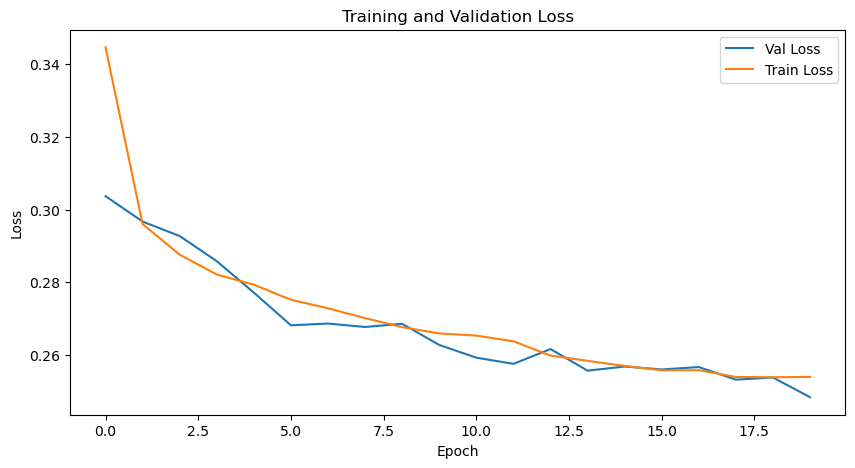

In [60]:
hist = pipeline.step_model_training.history[0]

plt.figure(figsize=(10, 5))
plt.plot(hist["val_loss"], label="Val Loss")
plt.plot(hist["train_loss"], label="Train Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

### 7.2. Pipeline Components in Detail

**Dataset Configuration**

The `ParquetDatasetConfig` is always the first step in your pipeline. It defines how to load and filter your data:

<div style="font-size:15px">

```python
ParquetDatasetConfig(
    path="./data/raw",                      # Path to your parquet files
    split=None,                             # Train/test split ratio (e.g., 0.8 for 80/20)
    download=False,                         # Whether to download the dataset
    columns=["T-JUS-CKP", "T-MON-CKP"],     # Features to use
    target_column="class",                  # Target variable column name
    target_class=[0, 1],                    # Classes to include (for binary classification)
)

**Preprocessing Steps**

You can chain multiple preprocessing steps. They will be executed in the order they appear:

<div style="font-size:15px">

```python
# Handle missing values
(
    ImputeMissingConfig(
        strategy="median",  # Options: "mean", "median", "forward", "backward"
        columns=["T-JUS-CKP"],  # Specific columns to impute
    ),
)

# Normalize the data
(
    NormalizeConfig(
        norm="l2"  # Options: "l1", "l2", "max", "standard"
    ),
)

# Create time windows
(
    WindowingConfig(
        window_size=100  # Number of time steps per window
    ),
)

**Feature Extraction (Optional)**

**Important:** Only one feature extraction method can be used at a time. Choose the one that best fits your problem:

**Option A: Statistical Features**

Extracts basic statistical features like mean, standard deviation, min, max, etc.:

<div style="font-size:15px">

```python
StatisticalConfig()

**Option B: Exponentially Weighted Statistical Features**

Extracts statistical features with exponential weighting, giving more importance to recent values:

<div style="font-size:15px">

```python
EWStatisticalConfig(
    selected_features=["ew_mean", "ew_std", "ew_skew"],         # Features to extract
    overlap=0.5,                                                # Window overlap (0.5 = 50% overlap)
    offset=0,                                                   # Starting offset
    decay=0.9,                                                  # Exponential decay factor (higher = more weight on recent values)
eps=1e-8,                                                       # Small constant for numerical stability
)


**Option C: Wavelet Features**

Extracts features using wavelet decomposition:

<div style="font-size:15px">

```python
WaveletConfig(
    level=3,                # Decomposition level
    overlap=0.5,            # Window overlap
    offset=0,               # Starting offset
    wavelet="haar",         # Wavelet type: "haar", "db4", "sym4", etc.
)

**Model Training**

Configure how your model will be trained:

<div style="font-size:15px">

```python
TrainerConfig(
    optimizer="adam",                       # Options: "adam", "sgd", "rmsprop"
    criterion="cross_entropy",              # Loss function
    batch_size=32,                          # Number of samples per batch
    epochs=20,                              # Number of training epochs
    seed=42,                                # Random seed for reproducibility
    config_model=config_model,              # Model architecture configuration
    learning_rate=0.001,                    # Learning rate
    cross_validation=False,                 # Whether to use cross-validation
    shuffle_train=True,                     # Whether to shuffle training data
)

**Model Assessment**

Define how to evaluate your model:

<div style="font-size:15px">

```python
ModelAssessmentConfig(
    metrics=["balanced_accuracy", "precision", "recall", "f1"],
    task_type=TaskType.CLASSIFICATION,                                  # Or TaskType.REGRESSION
    export_results=True,                                                # Save results to file
    generate_report=False,                                              # Generate detailed HTML report
)

### 7.3. Complete Pipeline Examples

**Example 1: Pipeline with Statistical Features**

<div style="font-size:15px">

```python
config_model = MLPConfig(
    hidden_sizes=(128, 64, 32),
    output_size=3,
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

pipeline = Pipeline(
    [
        ParquetDatasetConfig(
            path="./data/raw",
            split=0.8,
            download=False,
            columns=["T-JUS-CKP", "T-MON-CKP", "P-PDG"],
            target_column="class",
            target_class=[0, 1, 2],
        ),
        ImputeMissingConfig(strategy="mean", columns=None),  # Impute all columns
        NormalizeConfig(norm="standard"),
        WindowingConfig(window_size=150),
        StatisticalConfig(),  # Extract statistical features
        TrainerConfig(
            optimizer="adam",
            criterion="cross_entropy",
            batch_size=64,
            epochs=50,
            seed=42,
            config_model=config_model,
            learning_rate=0.0005,
            cross_validation=True,
            shuffle_train=True,
        ),
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "precision", "recall", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=True,
        ),
    ]
)

pipeline.run()

**Example 2: Pipeline with Wavelet Features**

<div style="font-size:15px">

```python
config_model = MLPConfig(
    hidden_sizes=(64, 32),
    output_size=2,
    random_seed=11,
    activation_function="tanh",
    regularization="l2",
)

pipeline = Pipeline(
    [
        ParquetDatasetConfig(
            path="../../data/raw",
            split=0.7,
            download=False,
            columns=["T-JUS-CKP", "T-MON-CKP"],
            target_column="class",
            target_class=[0, 1],
        ),
        ImputeMissingConfig(strategy="forward", columns=["T-JUS-CKP", "T-MON-CKP"]),
        NormalizeConfig(norm="l2"),
        WindowingConfig(window_size=200),
        WaveletConfig(
            level=4,
            overlap=0.5,
            offset=0,
            wavelet="db4",  # Daubechies wavelet
        ),
        TrainerConfig(
            optimizer="sgd",
            criterion="cross_entropy",
            batch_size=16,
            epochs=30,
            seed=11,
            config_model=config_model,
            learning_rate=0.01,
            cross_validation=False,
            shuffle_train=True,
        ),
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=False,
        ),
    ]
)

pipeline.run()

**Example 3: Minimal Pipeline**

<div style="font-size:15px">

```python
config_model = MLPConfig(
    hidden_sizes=(32, 16),
    output_size=3,
    random_seed=42,
    activation_function="relu",
    regularization=None,
)

pipeline = Pipeline(
    [
        ParquetDatasetConfig(
            path="./data/raw",
            split=None,
            download=False,
            columns=["T-JUS-CKP", "T-MON-CKP"],
            target_column="class",
            target_class=[0, 1, 2],
        ),
        TrainerConfig(
            optimizer="adam",
            criterion="cross_entropy",
            batch_size=32,
            epochs=20,
            seed=42,
            config_model=config_model,
            learning_rate=0.001,
            cross_validation=False,
            shuffle_train=True,
        ),
        ModelAssessmentConfig(
            metrics=["balanced_accuracy", "precision", "recall", "f1"],
            task_type=TaskType.CLASSIFICATION,
            export_results=True,
            generate_report=False,
        ),
    ]
)

pipeline.run()

### 7.4. Best Practices

**Choosing Feature Extraction Methods**

- **No Feature Extraction:** Use raw windowed data when you have enough data and computational resources. Best for deep learning models.
- **Statistical Features:** Fast and interpretable. Good baseline for most problems.
- **Exponentially Weighted Statistical Features:** When recent observations are more important than older ones (e.g., trending patterns).
- **Wavelet Features:** When you need to capture both time and frequency domain information. Good for signal processing tasks.

**Reproducibility**

Always set random seeds for reproducibility:

<div style="font-size:15px">

```python
config_model = MLPConfig(random_seed=42, ...)
TrainerConfig(seed=42, ...)

**Experiment Tracking**

Enable result export to keep track of your experiments:

<div style="font-size:15px">

```python
ModelAssessmentConfig(
    export_results=True,
    generate_report=True  # For detailed analysis
)

**Pipeline Debugging**

If your pipeline fails, check each component individually. You can comment out steps to isolate issues:

<div style="font-size:15px">

```python
pipeline = Pipeline([
    ParquetDatasetConfig(...),
    ImputeMissingConfig(...),
    # NormalizeConfig(...),  # Temporarily disabled for debugging
    WindowingConfig(...),
    # ... rest of the pipeline
])

After running your pipeline, proceed to analyze the results and iterate on your configuration to improve model performance. Consider experimenting with different feature extraction methods, hyperparameters, and preprocessing strategies.

__________

## 7. Report Generation
The `3WToolkit` provides a `ReportGeneration` module to automatically create comprehensive HTML or LaTeX reports from model evaluation results. This feature simplifies the process of documenting, sharing, and communicating model performance in a standardized format.

The `ReportGeneration` class takes the results from the `ModelAssessment` step and compiles them into a structured report that includes:

- **Model and Dataset Information**: Details about the model, its configuration, and the dataset used.
- **Performance Metrics**: A summary of key metrics like accuracy, precision, recall, and F1-score.
- **Confusion Matrix**: A visualization of the model's performance for each class.
- **Classification Report**: A detailed breakdown of metrics per class.
- **Custom Plots**: The ability to include additional plots, such as feature importance or prediction visualizations.

In this section, we will demonstrate how to generate a report using the evaluation results obtained in the previous step.

In [61]:
from ThreeWToolkit.reports.report_generation import ReportGeneration

model = trainer.model

X_train, y_train = dfs_final.iloc[:, :-1], dfs_final["label"].astype(int)
X_test, y_test = results['X_test'], results['true_values']
predictions = results['predictions']

calculated_metrics = results['metrics']
title = results['config']['report_title']
author = results['config']['report_author']

plots_config = {
    "PlotSeries": {
        "series": sig["P-TPT"],
        "title": "P-TPT",
        "xlabel": "Timestamp",
        "ylabel": "P-TPT",
        "overlay_events": False,
        'color': "green"
    }, #['P-TPT', 'T-TPT'],
    "PlotMultipleSeries": {
        "series_list": [sig[['P-MON-CKP']], sig[['P-TPT']]],
        "labels": ['P-MON-CKP', 'P-TPT'],
        "title": "P-MON-CKP' and 'P-TPT",
        "xlabel": "Timestamp",
        "ylabel": "Value"
    },
    "PlotCorrelationHeatmap": {
        "df_of_series": sig[['P-ANULAR', 'P-JUS-CKGL', 'P-MON-CKP', 'P-TPT', 'T-JUS-CKP', 'T-TPT']],
        "title": "Correlation Heatmap of Selected Features"
    }
}

title = "3WToolkit Signal Analysis Report"

report_generation = ReportGeneration(
    model=model,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    predictions=predictions,
    calculated_metrics=calculated_metrics,
    plot_config=plots_config,
    title=title,
    author=author,
    export_report_after_generate=False
)

html_report = report_generation.generate_summary_report(template_name="report_template.html", format="html")
latex_report = report_generation.generate_summary_report(format="latex")

report_generation.save_report(html_report, "signal_analysis_report", format="html")
report_generation.save_report(latex_report, "signal_analysis_report", format="latex")

Generating Markdown report from template: 'report_template.html'...
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-tpt.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-mon-ckp_and_p-tpt.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/correlation_heatmap_of_selected_features.png'
Markdown report generated successfully.
Generating Beamer report: '3WToolkit Signal Analysis Report'...
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-tpt.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-mon-ckp_and_p-tpt.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/correlation_heatmap_of_selected_features.png'
Beamer document generated successfully.
Saving HTML report to '/home/rafael/pos-doc/repos/3W/toolkit/ThreeWToolkit/reports/report-

### Export to CSV

The 3WToolkit also allows for easy exporting of data, such as model predictions and evaluation results, to CSV format. This is useful for external analysis, sharing, or integration with other data processing pipelines. In this section, we will demonstrate how to save the evaluation results to a CSV file.

In [62]:
df_results = report_generation.export_results_to_csv(results, filename="model_results.csv")
df_results.head()

Exporting results to 'model_results.csv'...
Successfully exported results to '/home/rafael/pos-doc/repos/3W/toolkit/ThreeWToolkit/reports/report-3WToolkit Signal Analysis Report/model_results.csv'.


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_98,feature_99,feature_100,true_values,predictions,model_name,balanced_accuracy,precision,recall,f1
0,0.0,0.000512,0.002046,0.004595,0.008151,0.012699,0.018221,0.024695,0.032097,0.040396,...,0.004591,0.002044,0.000512,2,2,MLP,0.950061,0.966484,0.965133,0.964926
1,0.0,0.000512,0.002045,0.004593,0.008147,0.012691,0.018209,0.024677,0.032071,0.040361,...,0.004587,0.002042,0.000511,2,2,MLP,0.950061,0.966484,0.965133,0.964926
2,0.0,0.000512,0.002045,0.004594,0.008148,0.012695,0.018216,0.024690,0.032091,0.040391,...,0.004591,0.002044,0.000512,2,2,MLP,0.950061,0.966484,0.965133,0.964926
3,0.0,0.000511,0.002042,0.004588,0.008138,0.012678,0.018190,0.024653,0.032042,0.040326,...,0.004595,0.002046,0.000512,2,2,MLP,0.950061,0.966484,0.965133,0.964926
4,0.0,0.000512,0.002044,0.004592,0.008145,0.012689,0.018206,0.024675,0.032070,0.040362,...,0.004599,0.002048,0.000512,2,2,MLP,0.950061,0.966484,0.965133,0.964926
